In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gwpy.table import EventTable

plt.style.use('default')

/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [2]:
Summary_Path = "data/GWTC4/IGWN-GWTC4p0-0f954158d_720-PESummaryTable.hdf5"
Summary_Table = EventTable.read(Summary_Path)

In [3]:
Summary_Table

result_label,gw_name,result_file_name,result_samples_key,superevent_id,total_mass_source_median,total_mass_source_lower,total_mass_source_upper,chirp_mass_source_median,chirp_mass_source_lower,chirp_mass_source_upper,mass_1_source_median,mass_1_source_lower,mass_1_source_upper,mass_2_source_median,mass_2_source_lower,mass_2_source_upper,final_mass_source_median,final_mass_source_median.mask,final_mass_source_lower,final_mass_source_lower.mask,final_mass_source_upper,final_mass_source_upper.mask,chi_eff_median,chi_eff_lower,chi_eff_upper,final_spin_median,final_spin_median.mask,final_spin_lower,final_spin_lower.mask,final_spin_upper,final_spin_upper.mask,luminosity_distance_median,luminosity_distance_lower,luminosity_distance_upper,redshift_median,redshift_lower,redshift_upper,network_matched_filter_snr_median,network_matched_filter_snr_lower,network_matched_filter_snr_upper,skymap_result_file_name
bytes55,bytes15,bytes70,bytes39,bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,float64,bool,float64,float64,float64,float64,bool,float64,bool,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes107
GW230518_125908-C00:IMRPhenomNSBH:LowSpin,GW230518_125908,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-combined_PEDataRelease.hdf5,C00:IMRPhenomNSBH:LowSpin,S230518h,9.561463710446187,1.3161485466722507,1.1643025993880691,2.7899692613489466,0.06344118776082786,0.06276877075385556,8.122719480628593,1.5767051386814703,1.304117548709053,1.444823633592922,0.1481325166497638,0.2609005788356702,9.412541103291073,False,1.3355768694497918,False,1.1750227406298137,False,-0.005905906140873805,0.17633199455046433,0.11316659914738324,0.3821704230966011,False,0.021358289466098246,False,0.031217112661908075,False,253.01897083511824,108.59060513958161,118.8260889125545,0.05502094335806712,0.02308575497914593,0.024470607153955326,13.972494121200306,0.3542647510057755,0.20128608222800892,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-IMRPhenomNSBH:LowSpin_Skymap_PEDataRelease.fits.gz
GW230518_125908-C00:IMRPhenomPv2-NRTidalv2:LowSpin,GW230518_125908,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-combined_PEDataRelease.hdf5,C00:IMRPhenomPv2-NRTidalv2:LowSpin,S230518h,9.449347220210713,2.422271903479568,1.093618455644247,2.7878984375640643,0.06267496131544448,0.05550492891388581,7.991366302468091,3.116593837827428,1.2331118402943169,1.4633728375756008,0.1510819379269004,0.6937860458558254,nan,True,nan,True,nan,True,-0.02014699590256967,0.39332356927612455,0.105856633454439,nan,True,nan,True,nan,True,253.71565140867156,94.64449373003751,117.70613261631146,0.0551667301716766,0.020075082825360163,0.024239005784395293,13.921802853512215,0.3642540197615709,0.22153924994551133,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-IMRPhenomPv2_NRTidalv2:LowSpin_Skymap_PEDataRelease.fits.gz
GW230518_125908-C00:IMRPhenomXPHM-SpinTaylor,GW230518_125908,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-combined_PEDataRelease.hdf5,C00:IMRPhenomXPHM-SpinTaylor,S230518h,9.620545152354259,0.8054107517023645,0.7387107632004053,2.7985125364877783,0.05780506813829733,0.056316123194483314,8.176078996270382,0.9399490887942719,0.8295979391556063,1.4468049040748239,0.10605095828560107,0.1378047704178076,nan,True,nan,True,nan,True,-0.012408506701723264,0.11319238960448368,0.08903824658202553,nan,True,nan,True,nan,True,236.7211154412265,97.88774009673696,107.57292089159526,0.05160229986474156,0.02087692606207253,0.022284032915514132,14.321671337193617,0.3815762183190827,0.2400690717091809,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-IMRPhenomXPHM_SpinTaylor_Skymap_PEDataRelease.fits.gz
GW230518_125908-C00:SEOBNRv4_ROM_NRTidalv2_NSBH:LowSpin,GW230518_125908,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-combined_PEDataRelease.hdf5,C00:SEOBNRv4_ROM_NRTidalv2_NSBH:LowSpin,S230518h,9.39132873434313,1.6234293102004367,1.4473916742404906,2.796782988680388,0.06279643947662805,0.059885132038739464,7.91961

In [4]:
DL = np.array(Summary_Table["luminosity_distance_median"])
DL_low = np.array(Summary_Table["luminosity_distance_median"] - Summary_Table["luminosity_distance_lower"])
DL_up = np.array(Summary_Table["luminosity_distance_median"] + Summary_Table["luminosity_distance_upper"])
Delta_DL = DL_up - DL_low
rel_err_DL = Delta_DL / DL

z = np.array(Summary_Table["redshift_median"])
z_low = np.array(Summary_Table["redshift_median"] - Summary_Table["redshift_lower"])
z_up = np.array(Summary_Table["redshift_median"] + Summary_Table["redshift_upper"])
Delta_z = z_up - z_low
rel_err_z = Delta_z / z

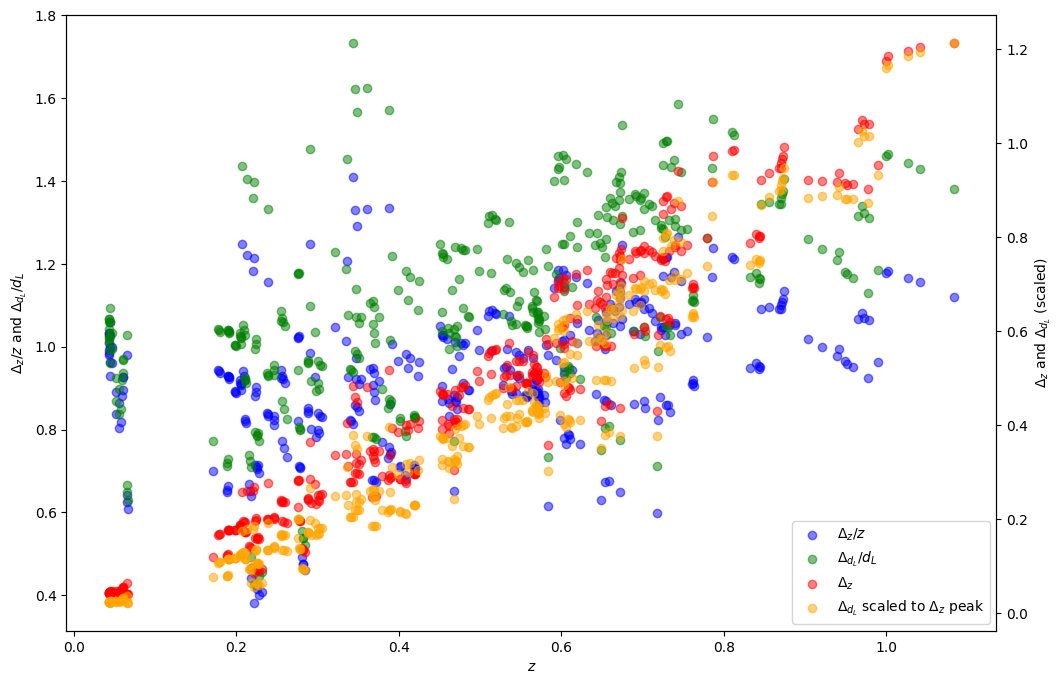

In [5]:
lines = []

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_xlabel(r'$z$')
ax1.set_ylabel(r'$\Delta_z / z$ and $\Delta_{d_L} / d_L$')

lines.append(ax1.scatter(z, rel_err_z, color='blue',
                         alpha=0.5, label=r'$\Delta_z / z$'))

lines.append(ax1.scatter(z, rel_err_DL, color='green',
                         alpha=0.5, label=r'$\Delta_{d_L} / d_L$'))

ax2 = ax1.twinx()

ax2.set_ylabel(r'$\Delta_z$ and $\Delta_{d_L}$ (scaled)')

lines.append(ax2.scatter(z, Delta_z, color='red',
                         alpha=0.5, label=r'$\Delta_z$'))

lines.append(ax2.scatter(z, Delta_DL / np.max(Delta_DL) * np.max(Delta_z), color='orange',
                         alpha=0.5, label=r'$\Delta_{d_L}$ scaled to $\Delta_z$ peak'))

ax1.legend(handles=lines, loc='lower right')

plt.show()

The relative error on the redshift is of the same order of the relative error on the luminosity distance. From GWs alone this will be also the case for ET.

Then see Figure 9.14 of [The Science of the Einstein Telescope](https://arxiv.org/pdf/2503.12263). ET will sufffer relative errors on the luminosity distance up to $50\%$ already at redshift $\sim 3$.

At higher redshift we also should caare about [this](https://arxiv.org/pdf/2303.16323). However this should not be important for $z \lesssim 10$.

Better to use https://arxiv.org/pdf/2303.15923 (Figure 20) and https://arxiv.org/pdf/2408.14946 (Figure 8)